# Pymaceuticals Inc.

### Analysis

- 1. Mouse weight seems to increase with tumor size.
-2. Capomulin seems to decrease the volume of tumors. 
-3. The regression may show a link between the size of a tumor and the overall weight of the mouse.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df= pd.merge(study_results,mouse_metadata,on='Mouse ID', how='left')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice.
combined_df['Mouse ID'].nunique()

249

In [10]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint']) == False]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint']) == False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [13]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

249

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev_tumor=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
stder_tumor=stdev_tumor/np.sqrt(np.size(clean_df))
summary_df_1=pd.merge(mean_tumor,median_tumor, on='Drug Regimen', how = 'right')
summary_df_2 = pd.merge(summary_df_1,variance_tumor,on='Drug Regimen', how='right')
summary_df_3=pd.merge(summary_df_2,stdev_tumor,on='Drug Regimen', how='right')
summary_df_dirty=pd.merge(summary_df_3,stder_tumor,on='Drug Regimen', how='right')
summary_df_dirty.columns=['Mean','Median','Variance','Std Dev','Std Error']
complete_summary_df=summary_df_dirty
complete_summary_df


C:\Users\jrile\AppData\Local\Temp\ipykernel_14480\2838497737.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Tumor Volume (mm3)_x'} in the result is deprecated and will raise a MergeError in a future version.
  summary_df_3=pd.merge(summary_df_2,stdev_tumor,on='Drug Regimen', how='right')


,Mean,Median,Variance,Std Dev,Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.040642
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.051003
Infubinol,52.884795,51.820584,43.128684,6.567243,0.053436
Ketapril,55.235638,53.698743,68.553577,8.279709,0.067370
Naftisol,54.331565,52.509285,66.173479,8.134708,0.066191
Placebo,54.033581,52.288934,61.168083,7.821003,0.063638
Propriva,52.393463,50.909965,43.138803,6.568014,0.053443
Ramicane,40.216745,40.673236,23.486704,4.846308,0.039433
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.062738


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_aggregate_df=clean_df.groupby('Drug Regimen').aggregate({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})

## Bar and Pie Charts

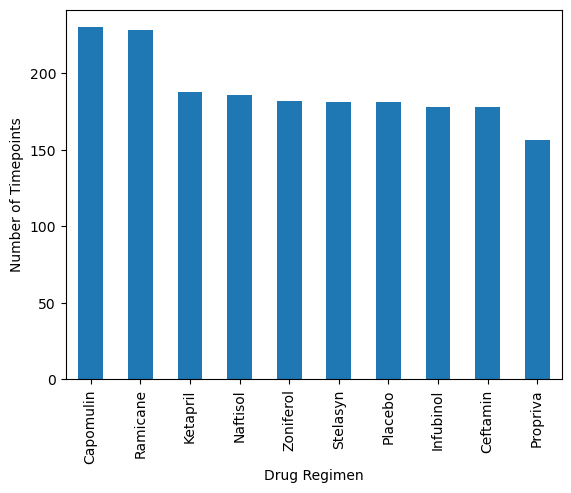

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
ycounts=clean_df['Drug Regimen'].value_counts()
ycounts.plot(kind='bar')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.show()




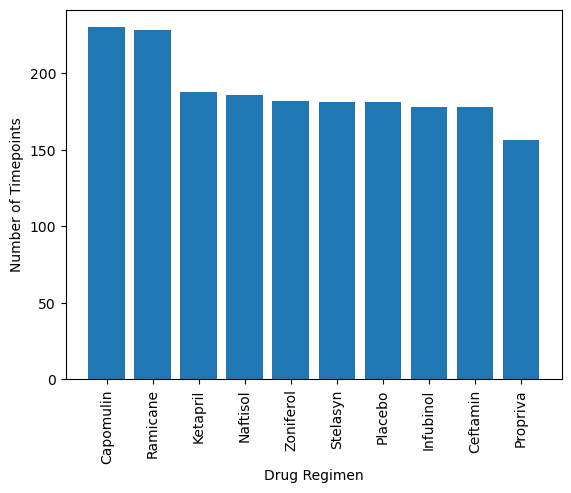

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
ycounts=clean_df['Drug Regimen'].value_counts()
xcounts=ycounts.index.values
plt.bar(xcounts, ycounts)
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.show()


<Axes: ylabel='Sex'>

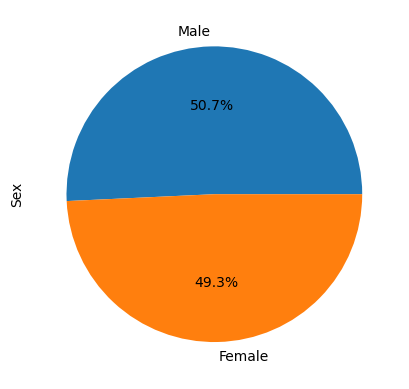

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gendercounts=clean_df['Sex'].value_counts()
gendercounts.plot(kind='pie',autopct='%1.1f%%')


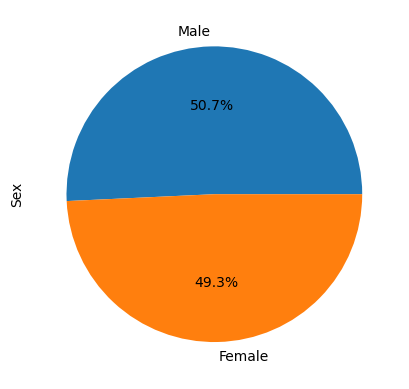

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gendercounts=clean_df['Sex'].value_counts()
xcounts=gendercounts.index.values
plt.pie(gendercounts,labels=xcounts,autopct='%1.1f%%',)
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

grouped_mice=clean_df.groupby('Mouse ID')
max_timepoints_df= grouped_mice['Timepoint'].max()
max_timepoints_df=max_timepoints_df.reset_index()
max_timepoints_df=max_timepoints_df.merge(clean_df,how='left',on=['Mouse ID','Timepoint'])
max_timepoints_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=['Capomulin','Ramicane', 'Infubinol','Ceftamin']




# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatment_list:
    finalvol=max_timepoints_df.loc[(max_timepoints_df['Drug Regimen']==regimen),'Tumor Volume (mm3)']
    tumor_vol_list.append(finalvol)
    quartiles=finalvol.quantile([.25,.5,.75])
    lowerq=quartiles[.25]
    upperq=quartiles[.75]
    iqr=upperq-lowerq
    upperbound=upperq+(1.5*iqr)
    lowerbound=lowerq-(1.5*iqr) 

    # add subset 
    
    # Determine outliers using upper and lower bounds
    outliers=finalvol.loc[(finalvol < lowerbound) | (finalvol > upperbound)]
    print(outliers)
print(tumor_vol_list)

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)
[19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64, 6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
77     33.562402
78     36.374510
92     31.560470
94     36.134852
97     22.050126
120    30.564625
127    31.095335
158    45.220869
159    36.561652
167    37.

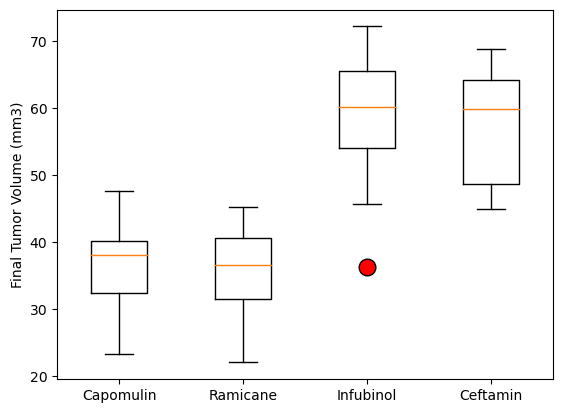

In [45]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out=dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_list,labels=treatment_list,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

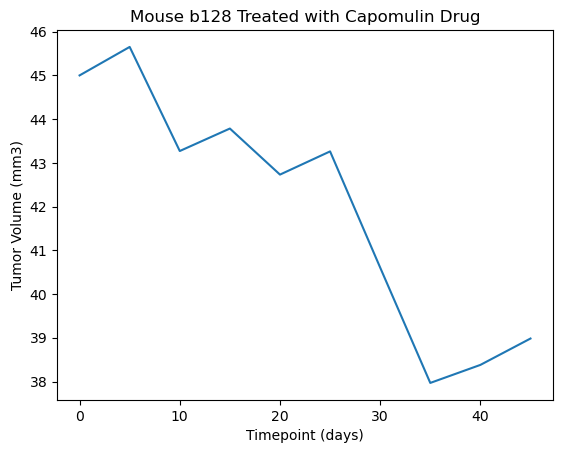

In [46]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table= clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
mousedata= capomulin_table.loc[capomulin_table['Mouse ID']== 'b128']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse b128 Treated with Capomulin Drug')
plt.show()

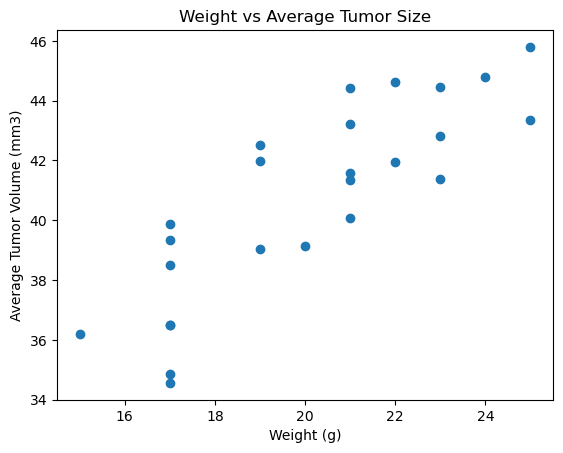

In [50]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_weight = capomulin_table.groupby(['Mouse ID'])['Weight (g)'].value_counts
capo_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)','Tumor Volume (mm3)']].mean()
plt.scatter(capo_average['Weight (g)'],capo_average['Tumor Volume (mm3)'])
plt.title('Weight vs Average Tumor Size')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlaiton between mouse weight and average tumor volume is 0.84


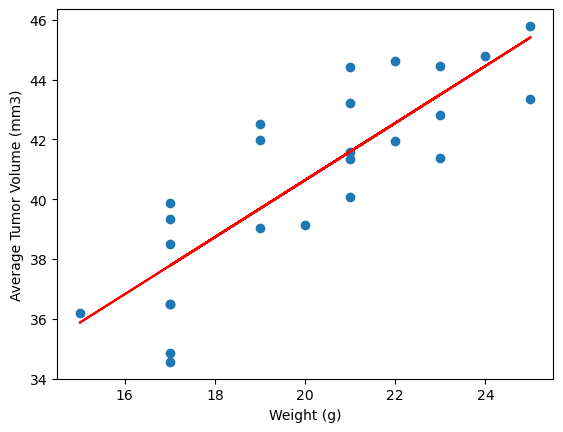

In [63]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(capo_average['Weight (g)'],capo_average['Tumor Volume (mm3)'])[0],2)
print(f'The correlaiton between mouse weight and average tumor volume is {corr}')
model= st.linregress(capo_average['Weight (g)'],capo_average['Tumor Volume (mm3)'])

y_values= capo_average['Weight (g)']*model[0]+model[1]
plt.scatter(capo_average['Weight (g)'],capo_average['Tumor Volume (mm3)'])
plt.plot((capo_average)['Weight (g)'],y_values,color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


